## data cleaning

In [ ]:
#imports
import sys
import os
from os.path import join
import glob
import pandas as pd
import numpy as np
import time
%load_ext autoreload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
dataroot = '/content/drive/MyDrive/IDS(attacks&Defense)'
SEED=2

In [ ]:
df_data=pd.read_csv("/content/drive/MyDrive/CICIDS2017/data_set.csv")
df_data.shape

(2830743, 79)

In [ ]:
df = df_data.sample(frac =.5, random_state = np.random.permutation(len(df_data)))
#df = df_data
print (df.shape)
#df.describe()
del df_data

(1415372, 79)


In [ ]:
#df = df[:5000]
#df.shape

In [ ]:
#df.info()

In [ ]:
#df.head()

In [ ]:
# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
df.isnull().sum().sum()

679

In [ ]:
# from matplotlib.pyplot import figure
# figure(figsize=(12, 3), dpi=80)
# df.isna().sum().plot(kind='bar')

In [ ]:
q1 = df.loc[df['Label'] == 'Web Attack-Sql Injection'] #[['num','val']]
q1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1612135,80,5038618,4,4,537,1881,537,0,134.25,268.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614749,80,5016759,5,5,599,4149,599,0,119.80,267.880944,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613284,80,78,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612093,80,508,2,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613237,80,5006168,4,4,599,2021,599,0,149.75,299.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614247,80,5007460,5,3,537,1881,537,0,107.40,240.153701,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614355,80,5012479,6,4,600,4149,600,0,100.00,244.948974,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1615051,80,109,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612058,80,5006127,4,4,447,530,447,0,111.75,223.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection


In [ ]:
q2 = df.loc[df['Label'] == 'Heartbleed'] #[['num','val']]
q2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2735847,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.12079,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


In [ ]:
q3 = df.loc[df['Label'] == 'Infiltration'] #[['num','val']]
q3

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1305744,444,119991834,5523,5525,2866110,33406,1274,0,518.940793,204.203530,...,20,9.978420e+05,8.314713e+05,1585781,409903,8143987.5,1.821774e+06,9432176,6855799,Infiltration
1320434,444,4042518,2,1,101,6,95,6,50.500000,62.932504,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1384003,444,101086101,25,25,5821,150,1181,6,232.840000,369.048515,...,20,5.698800e+05,1.494452e+04,582609,553425,32900000.0,1.910000e+07,55000000,21800000,Infiltration
1377850,444,99891716,15,15,5065,90,1460,6,337.666667,457.943176,...,20,5.699020e+05,0.000000e+00,569902,569902,98800000.0,0.000000e+00,98800000,98800000,Infiltration
1405503,444,104790355,15,15,5066,90,1036,6,337.733333,402.143447,...,20,5.715800e+05,0.000000e+00,571580,571580,104000000.0,0.000000e+00,104000000,104000000,Infiltration
1454069,444,48450959,7,8,1959,48,963,6,279.857143,369.463317,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1299546,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1359302,444,100460141,26,26,5776,156,1002,6,222.153846,304.565224,...,20,5.684117e+05,5.121990e+03,574107,564183,32700000.0,1.910000e+07,54800000,21400000,Infiltration
1310743,444,78233714,48,52,12042,586,1460,0,250.875000,422.794534,...,20,2.024844e+06,3.093999e+06,7461188,3051,13600000.0,1.020000e+07,29500000,5662979,Infiltration
1317024,444,69365637,1031,1031,307939,6186,1271,6,298.679922,270.071527,...,20,1.640000e+07,0.000000e+00,16400000,16400000,13900000.0,0.000000e+00,13900000,13900000,Infiltration


In [ ]:
df_label = df['Label']

In [ ]:
# change the label column
df_label = df_label.replace({ 'Web Attack-Sql Injection' : 'Web Attack', 
                               'Heartbleed' : 'Web Attack',
                               'Infiltration' : 'Web Attack',
                               'Web Attack-Brute Force' : 'Web Attack',
                               'Web Attack-XSS' : 'Web Attack'
                               })

In [ ]:
# dropping bad columns, they coause issues due to large numbers
data = df.drop(columns=['Flow Packets/s','Flow Bytes/s', 'Label'])
del df

#filling missing features
data.fillna(data.mean(), inplace=True)

#convert data to numeric
data = data.astype(float).apply(pd.to_numeric)

# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
data.isnull().sum().sum()

0

In [ ]:
# print label distribution
pd.DataFrame(df_label.value_counts()).to_csv('class_distribution.csv')
df_label.value_counts()

BENIGN              1136395
DoS Hulk             115964
PortScan              79331
DDoS                  63859
DoS GoldenEye          5137
FTP-Patator            3980
SSH-Patator            2957
DoS slowloris          2864
DoS Slowhttptest       2791
Web Attack             1106
Bot                     988
Name: Label, dtype: int64

In [ ]:
label_names = pd.Series(df_label, name='Label').unique()
label_names

array(['BENIGN', 'DoS Hulk', 'DDoS', 'PortScan', 'DoS GoldenEye',
       'FTP-Patator', 'DoS slowloris', 'SSH-Patator', 'Web Attack',
       'DoS Slowhttptest', 'Bot'], dtype=object)

In [ ]:
#,'Infiltration' ,'Web Attack-Sql Injection',

In [ ]:
len (label_names)

11

In [ ]:
data.shape

(1415372, 76)

# Data Imbalance

In [ ]:
def make_value2index(attacks):
    #make dictionary
    attacks = sorted(attacks)
    d = {}
    counter=0
    for attack in attacks:
        d[attack] = counter
        counter+=1
    return d

In [ ]:
# chganges label from string to integer/index
def encode_label(Y_str):
    labels_d = make_value2index(np.unique(Y_str))
    Y = [labels_d[y_str] for y_str  in Y_str]
    Y = np.array(Y)
    return np.array(Y)

In [ ]:
X = data.values
y = encode_label(df_label.values)
del data

In [ ]:
# normalization
def normalize(data):
        data = data.astype(np.float32)       
        eps = 1e-15
        mask = data==-1
        data[mask]=0
        mean_i = np.mean(data,axis=0)
        min_i = np.min(data,axis=0) #  to leave -1 (missing features) values as is and exclude in normilizing
        max_i = np.max(data,axis=0)

        r = max_i-min_i+eps
        data = (data-mean_i)/r  # zero centered 

        #deal with missing features -1
        data[mask] = 0        
        return data

In [ ]:
X = normalize(X)

In [ ]:
def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns    
    result = np.zeros((x.shape[0], 81))
    result[:, :-5] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0] ,-1, 9, 9 ))
    #result = result[..., tf.newaxis]
    return result

In [ ]:
X = reshape_dataset_cnn(X)
X.shape , y.shape

((1415372, 1, 9, 9), (1415372,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1132297, 1, 9, 9), (1132297,), (283075, 1, 9, 9), (283075,))

In [ ]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


## Adversarial attacks

In [ ]:
!pip install adversarial-robustness-toolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
import numpy as np
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import CarliniL2Method
from art.attacks.evasion import DeepFool
from art.attacks.evasion import BasicIterativeMethod
from art.attacks.evasion import SaliencyMapMethod
from art.estimators.classification import PyTorchClassifier
from art.defences.preprocessor import FeatureSqueezing
from art.defences.preprocessor import TotalVarMin
from art.defences.preprocessor import SpatialSmoothing
from art.defences.preprocessor import JpegCompression

from torch.utils.data import TensorDataset

In [ ]:
from art.attacks.evasion import ProjectedGradientDescent
from art.attacks.evasion import AutoProjectedGradientDescent

In [ ]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [ ]:
class Generator(nn.Module):

    def __init__(self, in_ch):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 64, 3 , stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.deconv3 = nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.deconv4 = nn.ConvTranspose2d(64, in_ch, 3, stride=2, padding=1)

    def forward(self, x):
        h = F.leaky_relu(self.bn1(self.conv1(x)))
        h = F.leaky_relu(self.bn2(self.conv2(h)))
        h = F.leaky_relu(self.bn3(self.deconv3(h)))
        h = torch.tanh(self.deconv4(h))
        return h

In [ ]:
G = Generator(1).to(device)
G.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/checkpoint/CNN/1.tar")["generator"])
G.eval()

Generator(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv4): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [ ]:
G1 = Generator(1).to(device)
G1.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/checkpoint/CNN/4.tar")["generator"])
G1.eval()

Generator(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv4): ConvTranspose2d(64, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [ ]:
#G2 = Generator(1).to(device)
#G2.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/checkpoint/CNN/4.tar")["generator"])
#G2.eval()

In [ ]:
# test_loader = torch.utils.data.DataLoader(
#             torchvision.datasets.CIFAR10(root = './', train=False, download=False,
#                            transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor()])),
#             batch_size=128, shuffle=False)

In [ ]:
batch_size = 128
#num_class = len(np.unique(df_label))
num_class = 11

In [ ]:
tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]).to(device)
tensor_y_test = torch.LongTensor(y_test).to(device) 

test_data = TensorDataset(tensor_x_test,tensor_y_test)     
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)      

In [ ]:
class MnistCNN(nn.Module):

    def __init__(self,input_dim,num_classes):
        super(MnistCNN, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(1, 32, 3,1)
        self.conv2 = nn.Conv2d(32, 64, 3 ,1)
        self.fc3 = nn.Linear(64, 64)
        #self.fc4 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(input_dim*64,num_classes)
        #fc_layers.append(nn.Linear(input_dim*128,num_classes))
        
    def forward(self, x):    
        h = F.relu(self.conv1(x))        
        h = F.relu(self.conv2(h))        
        h = F.dropout2d(F.max_pool2d(h, 5), p=0.25)
        h = F.dropout2d(self.fc3(h.view(h.size(0), -1)), p=0.5)
        h = self.fc4(h)
        return F.log_softmax(h,dim=1)
    

class CifarCNN(nn.Module):

    def __init__(self , num_classes):
        super(CifarCNN, self).__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, num_classes)

    def forward(self, x):
        h = F.relu(self.bn1(self.conv1(x)))        
        h = F.relu(self.bn2(self.conv2(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn3(self.conv3(h)))   
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn4(self.conv4(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.fc5(h.view(h.size(0), -1)))
        h = F.relu(self.fc6(h))
        h = self.fc7(h)
        return F.log_softmax(h,dim=1)
    

In [ ]:
model = CifarCNN(num_classes=num_class).to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/models/CifarCNN.tar")["state_dict"])
model.eval()

CifarCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=256, bias=True)
  (fc7): Linear(in_features=256, out_features=11, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
classifier = PyTorchClassifier(
    model=model,
    clip_values=(0, 1),
    loss=criterion,
    optimizer=optimizer,
    #input_shape=(3, 32, 32),
    input_shape=(1, 9, 9),
    nb_classes=11,
)

In [ ]:
num = 0
accuracy = 0
for x_test, y_test in test_loader:
    predictions = classifier.predict(x_test)
    num = num + len(x_test)
    accuracy += np.sum(np.argmax(predictions, axis=1) == y_test.numpy())
print('Accuracy on benign test examples:{}%'.format(accuracy/num*100))

Accuracy on benign test examples:97.5518855427007%


## **PGD Attack**

In [ ]:
ape_gan_acc0 = []
PGD_accu   = []

attack_fgsm = ProjectedGradientDescent(estimator=classifier, batch_size=32, eps_step=0.1, max_iter=10)

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"PGD":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/PGD.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc0.append(re_accuracy/num*100)
    PGD_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: PGD {:.6f}, real_accuracy {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 26.562500, real_accuracy 84.375000


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 26.171875, real_accuracy 84.765625


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 21.354167, real_accuracy 83.854167


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 21.093750, real_accuracy 82.421875


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.031250, real_accuracy 82.812500


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.135417, real_accuracy 82.552083


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.656250, real_accuracy 82.812500


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.851562, real_accuracy 83.007812


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.656250, real_accuracy 82.378472


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.656250, real_accuracy 81.718750


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.940341, real_accuracy 82.031250


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 23.372396, real_accuracy 82.226562


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.896635, real_accuracy 82.091346


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 23.046875, real_accuracy 82.031250


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.395833, real_accuracy 81.614583


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: PGD 22.216797, real_accuracy 81.884766


In [ ]:
from sklearn.metrics import precision_score, recall_score ,f1_score
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/PGD.tar')
adv_fgsm = fgsm['PGD']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: PGD {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
#print('Precision fgsm is: ', precision_score(np.argmax(re_y, axis=1), y_test, average='weighted', labels=np.unique(re_y)))
print('Precision PGD is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall PGD is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 PGD is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: PGD 19.531250, ape 85.937500
Precision PGD is:  65.74141709276844
Recall PGD is:  22.52252252252252
F1 PGD is:  33.55079217148183


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Precision, Recall and F1 score for APE_GAN++ after eliminating the PGD attack**

In [ ]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  85.61648137679795
Recall ape is:  90.1639344262295
F1 ape is:  87.7224824355972


# **Auto-PGD** **Attack**

In [ ]:
ape_gan_acc00 = []
Auto_PGD_accu   = []

attack_fgsm = AutoProjectedGradientDescent(estimator=classifier, batch_size=32, eps_step=0.01, max_iter=10)

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Auto_PGD":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Auto_PGD.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc00.append(re_accuracy/num*100)
    Auto_PGD_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: Auto-PGD {:.6f}, real_accuracy {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
      break

AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 1.562500, real_accuracy 86.718750


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 0.781250, real_accuracy 84.765625


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 1.822917, real_accuracy 83.854167


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 2.343750, real_accuracy 83.203125


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 2.656250, real_accuracy 83.593750


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 2.994792, real_accuracy 83.463542


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.125000, real_accuracy 84.151786


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.222656, real_accuracy 84.179688


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.211806, real_accuracy 84.114583


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.125000, real_accuracy 83.906250


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.053977, real_accuracy 83.593750


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.125000, real_accuracy 83.398438


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.305288, real_accuracy 83.653846


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.236607, real_accuracy 83.816964


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.125000, real_accuracy 83.802083


AutoPGD - restart:   0%|          | 0/5 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/4 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

AutoPGD - batch:   0%|          | 0/1 [00:00<?, ?it/s]

AutoPGD - iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: Auto-PGD 3.466797, real_accuracy 83.740234


In [ ]:
from sklearn.metrics import precision_score, recall_score ,f1_score
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Auto_PGD.tar')
adv_fgsm = fgsm['Auto_PGD']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: Auto-PGD {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
#print('Precision fgsm is: ', precision_score(np.argmax(re_y, axis=1), y_test, average='weighted', labels=np.unique(re_y)))
print('Precision Auto-PGD is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall Auto-PGD is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 Auto-PGD is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: Auto-PGD 8.593750, ape 82.812500
Precision Auto-PGD is:  29.422669491525422
Recall Auto-PGD is:  9.322033898305085
F1 Auto-PGD is:  14.158277048553588


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Precision, Recall and F1 score for APE_GAN++ after eliminating the Auto-PGD attack**

In [ ]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  84.60034619692495
Recall ape is:  86.88524590163934
F1 ape is:  83.72613582353215


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## fgsm attack

In [ ]:
ape_gan_acc1 = []
adv_accu   = []

attack_fgsm = FastGradientMethod(estimator=classifier,eps=0.15)

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_FGSM":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_FGSM.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc1.append(re_accuracy/num*100)
    adv_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: fgsm {:.6f}, real_accuracy {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

Accuracy: fgsm 80.468750, real_accuracy 85.156250
Accuracy: fgsm 82.421875, real_accuracy 89.843750
Accuracy: fgsm 80.989583, real_accuracy 88.802083
Accuracy: fgsm 80.078125, real_accuracy 89.062500
Accuracy: fgsm 80.000000, real_accuracy 89.531250
Accuracy: fgsm 80.468750, real_accuracy 89.453125
Accuracy: fgsm 80.468750, real_accuracy 88.839286
Accuracy: fgsm 79.980469, real_accuracy 88.867188
Accuracy: fgsm 80.034722, real_accuracy 88.888889
Accuracy: fgsm 80.000000, real_accuracy 89.140625
Accuracy: fgsm 79.829545, real_accuracy 89.488636
Accuracy: fgsm 79.817708, real_accuracy 89.453125
Accuracy: fgsm 79.687500, real_accuracy 89.242788
Accuracy: fgsm 79.910714, real_accuracy 89.453125
Accuracy: fgsm 80.052083, real_accuracy 89.375000
Accuracy: fgsm 79.541016, real_accuracy 89.404297


In [ ]:
from sklearn.metrics import precision_score, recall_score ,f1_score
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_FGSM.tar')
adv_fgsm = fgsm['Adv_FGSM']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: fgsm {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
#print('Precision fgsm is: ', precision_score(np.argmax(re_y, axis=1), y_test, average='weighted', labels=np.unique(re_y)))
print('Precision fgsm is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall fgsm is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 fgsm is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: fgsm 71.875000, ape 89.843750
Precision fgsm is:  63.74760430487984
Recall fgsm is:  77.31092436974791
F1 fgsm is:  69.87718164188752


## Precision, Recall and F1 score for APE_GAN++ after eliminating the FGSM attack

In [ ]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  90.0864651416122
Recall ape is:  95.83333333333334
F1 ape is:  92.71020908363344


## BIM attack

In [ ]:
attack_fgsm = BasicIterativeMethod(estimator=classifier, eps=0.15, eps_step=0.05)

ape_gan_acc2 = []
bim_accu  = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_BIM":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_BIM.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())
    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc2.append(re_accuracy/num*100)
    bim_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: BIM {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 34.375000, ape 85.937500


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 37.500000, ape 87.109375


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 38.541667, ape 86.458333


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 37.890625, ape 86.328125


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 36.406250, ape 86.093750


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 34.895833, ape 85.677083


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 34.598214, ape 85.714286


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 35.253906, ape 86.621094


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 35.156250, ape 86.892361


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 35.312500, ape 87.109375


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 35.369318, ape 86.931818


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 34.960938, ape 86.588542


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 34.435096, ape 86.538462


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 34.765625, ape 86.607143


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 34.791667, ape 86.406250


PGD - Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: BIM 35.107422, ape 86.474609


In [ ]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_BIM.tar')
adv_fgsm = fgsm['Adv_BIM']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: BIM {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision BIM is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall BIM is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 BIM is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: BIM 39.843750, ape 87.500000
Precision BIM is:  70.77922077922078
Recall BIM is:  42.857142857142854
F1 BIM is:  53.38775510204081


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Precision, Recall and F1 score for APE_GAN++ after eliminating the BIM attack

In [ ]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  89.23536356691437
Recall ape is:  94.11764705882352
F1 ape is:  90.2723988145983


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## JSMA attack

In [ ]:
attack_fgsm = SaliencyMapMethod(classifier=classifier, theta=0.01, gamma=0.8)
#attack_fgsm = SaliencyMapMethod(classifier=classifier, theta=0.01, gamma=1.8)
ape_gan_acc3 = []
jsma_accu   = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_JSMA":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_JSMA.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
    
    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    ape_gan_acc3.append(re_accuracy/num*100)
    jsma_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: JSMA {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 46.093750, ape 89.062500


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 37.500000, ape 85.546875


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 25.260417, ape 84.375000


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 19.726562, ape 83.398438


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 19.218750, ape 84.218750


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 17.578125, ape 84.114583


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 15.401786, ape 83.928571


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 15.332031, ape 84.082031


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 14.322917, ape 84.201389


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 13.437500, ape 84.375000


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 12.286932, ape 84.730114


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 11.458333, ape 84.765625


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 10.637019, ape 84.615385


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 11.551339, ape 84.654018


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 11.041667, ape 85.156250


JSMA:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: JSMA 10.693359, ape 85.009766


In [ ]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_JSMA.tar')
adv_fgsm = fgsm['Adv_JSMA']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: JSMA {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision JSMA is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall JSMA is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 JSMA is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)


Accuracy: JSMA 5.468750, ape 82.812500
Precision JSMA is:  49.51456310679612
Recall JSMA is:  6.79611650485437
F1 JSMA is:  11.951791094743891


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Precision, Recall and F1 score for APE_GAN++ after eliminating the JSMA attack

In [ ]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  84.22287834052538
Recall ape is:  89.07563025210085
F1 ape is:  86.05012427506215


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DeepFool attack

In [ ]:
attack_fgsm = DeepFool(classifier=classifier, batch_size=32, max_iter=10, epsilon=0.17)

ape_gan_acc4 = []
Deepfool_accu   = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_DeepFool":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_DeepFool.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())

    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2

    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)
    
    ape_gan_acc4.append(re_accuracy/num*100)
    Deepfool_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: DeepFool {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 76.562500, ape 83.593750


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 75.390625, ape 82.421875


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.343750, ape 84.375000


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.929688, ape 83.789062


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 78.437500, ape 83.906250


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.994792, ape 83.203125


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.343750, ape 82.700893


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.539062, ape 82.714844


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 76.822917, ape 82.291667


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 76.953125, ape 82.343750


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.130682, ape 82.457386


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.408854, ape 82.682292


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.223558, ape 82.692308


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.008929, ape 82.645089


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 76.718750, ape 82.395833


DeepFool:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy: DeepFool 77.001953, ape 82.568359


In [ ]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_DeepFool.tar')
adv_fgsm = fgsm['Adv_DeepFool']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: DeepFool {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision DeepFool is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall DeepFool is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 DeepFool is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)

Accuracy: DeepFool 81.250000, ape 85.156250
Precision DeepFool is:  77.76819096922634
Recall DeepFool is:  85.24590163934425
F1 DeepFool is:  81.33553917882386


## Precision, Recall and F1 score for APE_GAN++ after eliminating the DeepFool attack

In [ ]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  90.05791828945753
Recall ape is:  89.34426229508196
F1 ape is:  85.91800760494573


In [76]:
attack_fgsm = CarliniL2Method(classifier=classifier, confidence=0.1,binary_search_steps=10, max_iter=10)

ape_gan_acc5 = []
cw_accu   = []

adv_fgsm_accuracy = 0
re_accuracy = 0
num = 0
for x_test, y_test in test_loader:
    #print(x_test .shape)
    adv_fgsm = attack_fgsm.generate(x=x_test.data.cpu().numpy())
    torch.save({"Adv_CW":adv_fgsm,"y":y_test}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_CW.tar")
    adv_fgsm_predictions = classifier.predict(adv_fgsm)
    adv_fgsm_accuracy += np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())


    re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
    re_y2 = classifier.predict(re_x2.to(device).detach().numpy())

    re_y = re_y2
  
    re_accuracy += np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
    num = num + len(x_test)

    ape_gan_acc5.append(re_accuracy/num*100)
    cw_accu.append(adv_fgsm_accuracy/num*100)

    print("Accuracy: CW {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/num*100, re_accuracy/num*100) , flush=True)
    if num>2000:
        break

C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 75.000000, ape 88.281250


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 73.828125, ape 88.281250


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.354167, ape 84.895833


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.875000, ape 83.984375


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.718750, ape 84.687500


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 72.265625, ape 84.895833


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.763393, ape 84.486607


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.777344, ape 84.277344


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.354167, ape 84.288194


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.562500, ape 84.453125


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.946023, ape 84.446023


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 72.070312, ape 84.375000


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 72.175481, ape 84.495192


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.763393, ape 83.984375


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.979167, ape 84.010417


C&W L_2:   0%|          | 0/128 [00:00<?, ?it/s]

Accuracy: CW 71.240234, ape 83.544922


In [77]:
fgsm = torch.load('/content/drive/MyDrive/IDS(attacks&Defense)/models/Adv_CW.tar')
adv_fgsm = fgsm['Adv_CW']
y_test = fgsm['y']
adv_fgsm_predictions = classifier.predict(adv_fgsm)
adv_fgsm_accuracy = np.sum(np.argmax(adv_fgsm_predictions, axis=1) == y_test.numpy())
re_x1 = G(torch.from_numpy(adv_fgsm).to(device))
re_y1 = classifier.predict(re_x1.cpu().detach().numpy())

re_x2 = G1(torch.from_numpy(adv_fgsm).to(device))
re_y2 = classifier.predict(re_x2.cpu().detach().numpy())
re_y = re_y2

re_accuracy = np.sum(np.argmax(re_y, axis=1) == y_test.numpy())
print("Accuracy: C&W {:.6f}, ape {:.6f}".format(adv_fgsm_accuracy/len(y_test)*100, re_accuracy/len(y_test)*100) , flush=True)
print('Precision C&W is: ', precision_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('Recall C&W is: ', recall_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)
print('F1 C&W is: ', f1_score(y_test.numpy(), np.argmax(adv_fgsm_predictions, axis=1), average='weighted', labels=np.unique(np.argmax(adv_fgsm_predictions, axis=1)))* 100)

Accuracy: C&W 60.156250, ape 76.562500
Precision C&W is:  66.8546365914787
Recall C&W is:  67.54385964912281
F1 C&W is:  67.1974808816914


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Precision, Recall and F1 score for APE_GAN++ after eliminating the DeepFool attack

In [78]:
print('Precision ape is: ', precision_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('Recall ape is: ', recall_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)
print('F1 ape is: ', f1_score(y_test.numpy(), np.argmax(re_y, axis=1), average='weighted', labels=np.unique(np.argmax(re_y, axis=1)))* 100)

Precision ape is:  73.91304347826087
Recall ape is:  77.77777777777779
F1 ape is:  71.51861066955406


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

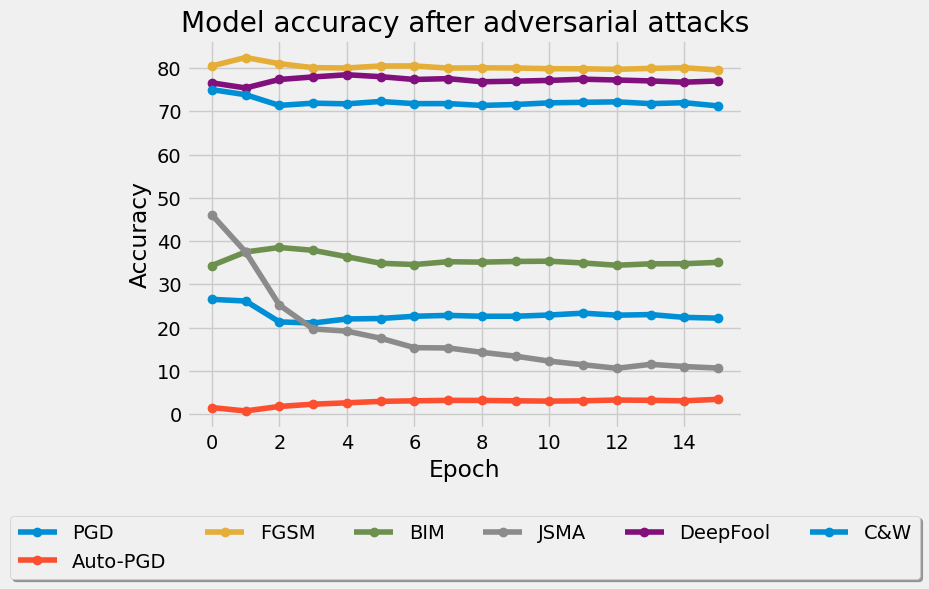

In [80]:
plt.plot(PGD_accu,'-o')
plt.plot(Auto_PGD_accu,'-o')

plt.plot(adv_accu,'-o')
plt.plot(bim_accu, '-o')
plt.plot(jsma_accu, '-o')
plt.plot(Deepfool_accu, '-o')
plt.plot(cw_accu, '-o')

#plt.plot(ape_gan_acc1, '-o')
#plt.plot(ape_gan_acc2, '-o')
#plt.plot(ape_gan_acc3, '-o')
#plt.plot(ape_gan_acc4, '-o')
#plt.plot(ape_gan_acc5, '-o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['PGD', 'Auto-PGD','FGSM', 'BIM', 'JSMA', 'DeepFool', 'C&W'], loc='upper center', bbox_to_anchor=(0.5, -0.199),
          fancybox=True, shadow=True, ncol=6)
plt.title('Model accuracy after adversarial attacks')
plt.show()

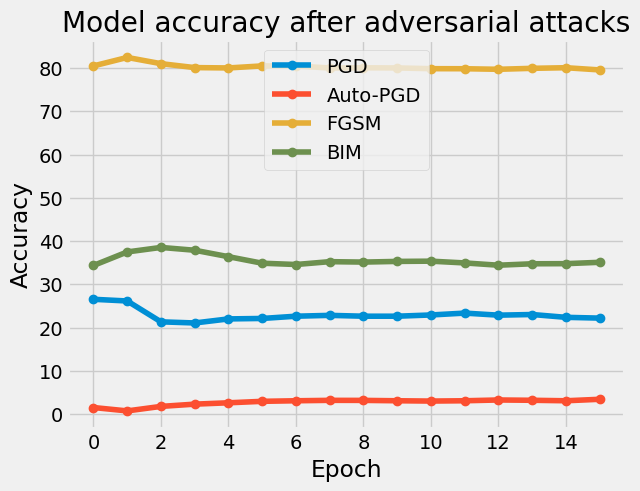

In [81]:
plt.plot(PGD_accu,'-o')
plt.plot(Auto_PGD_accu,'-o')
plt.plot(adv_accu,'-o')
plt.plot(bim_accu, '-o')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['PGD', 'Auto-PGD','FGSM', 'BIM'])
plt.title('Model accuracy after adversarial attacks')
plt.show()


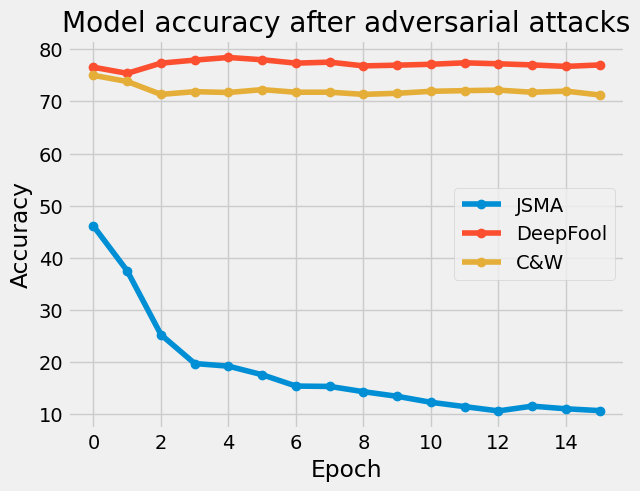

In [82]:
plt.plot(jsma_accu, '-o')
plt.plot(Deepfool_accu, '-o')
plt.plot(cw_accu, '-o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['JSMA', 'DeepFool', 'C&W'])
plt.title('Model accuracy after adversarial attacks')
plt.show()

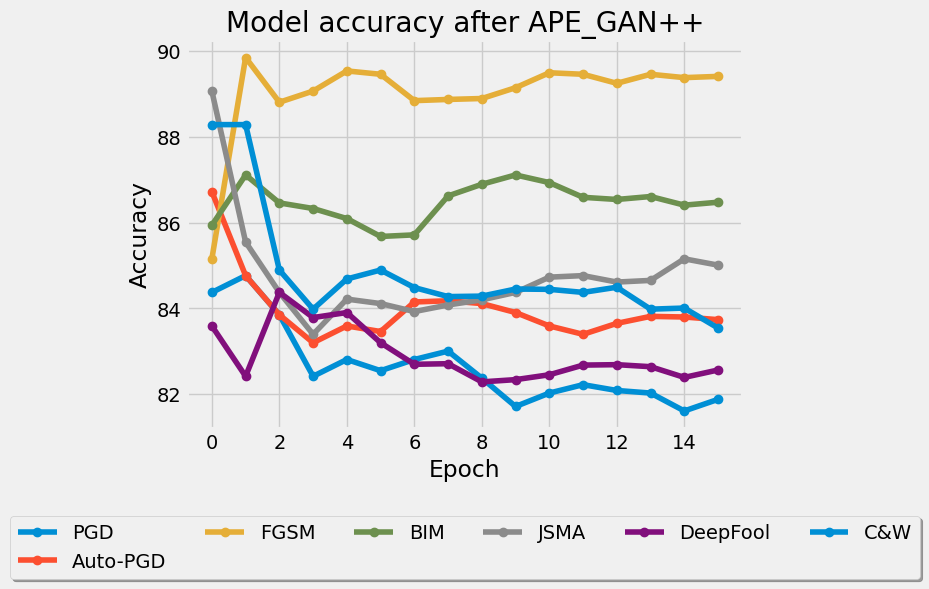

In [83]:
plt.plot(ape_gan_acc0, '-o')
plt.plot(ape_gan_acc00, '-o')
plt.plot(ape_gan_acc1, '-o')
plt.plot(ape_gan_acc2, '-o')
plt.plot(ape_gan_acc3, '-o')
plt.plot(ape_gan_acc4, '-o')
plt.plot(ape_gan_acc5, '-o')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['PGD', 'Auto-PGD', 'FGSM', 'BIM', 'JSMA', 'DeepFool', 'C&W'], loc='upper center', bbox_to_anchor=(0.5, -0.199),
          fancybox=True, shadow=True, ncol=6)
plt.title('Model accuracy after APE_GAN++')
plt.show()

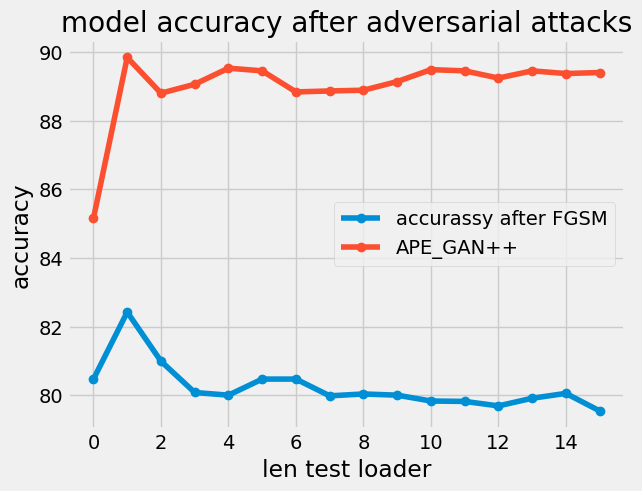

In [84]:
plt.plot(adv_accu,'-o')
plt.plot(ape_gan_acc1, '-o')


plt.xlabel('len test loader')
plt.ylabel('accuracy')
plt.legend(['accurassy after FGSM', 'APE_GAN++'])
plt.title('model accuracy after adversarial attacks')
plt.show()

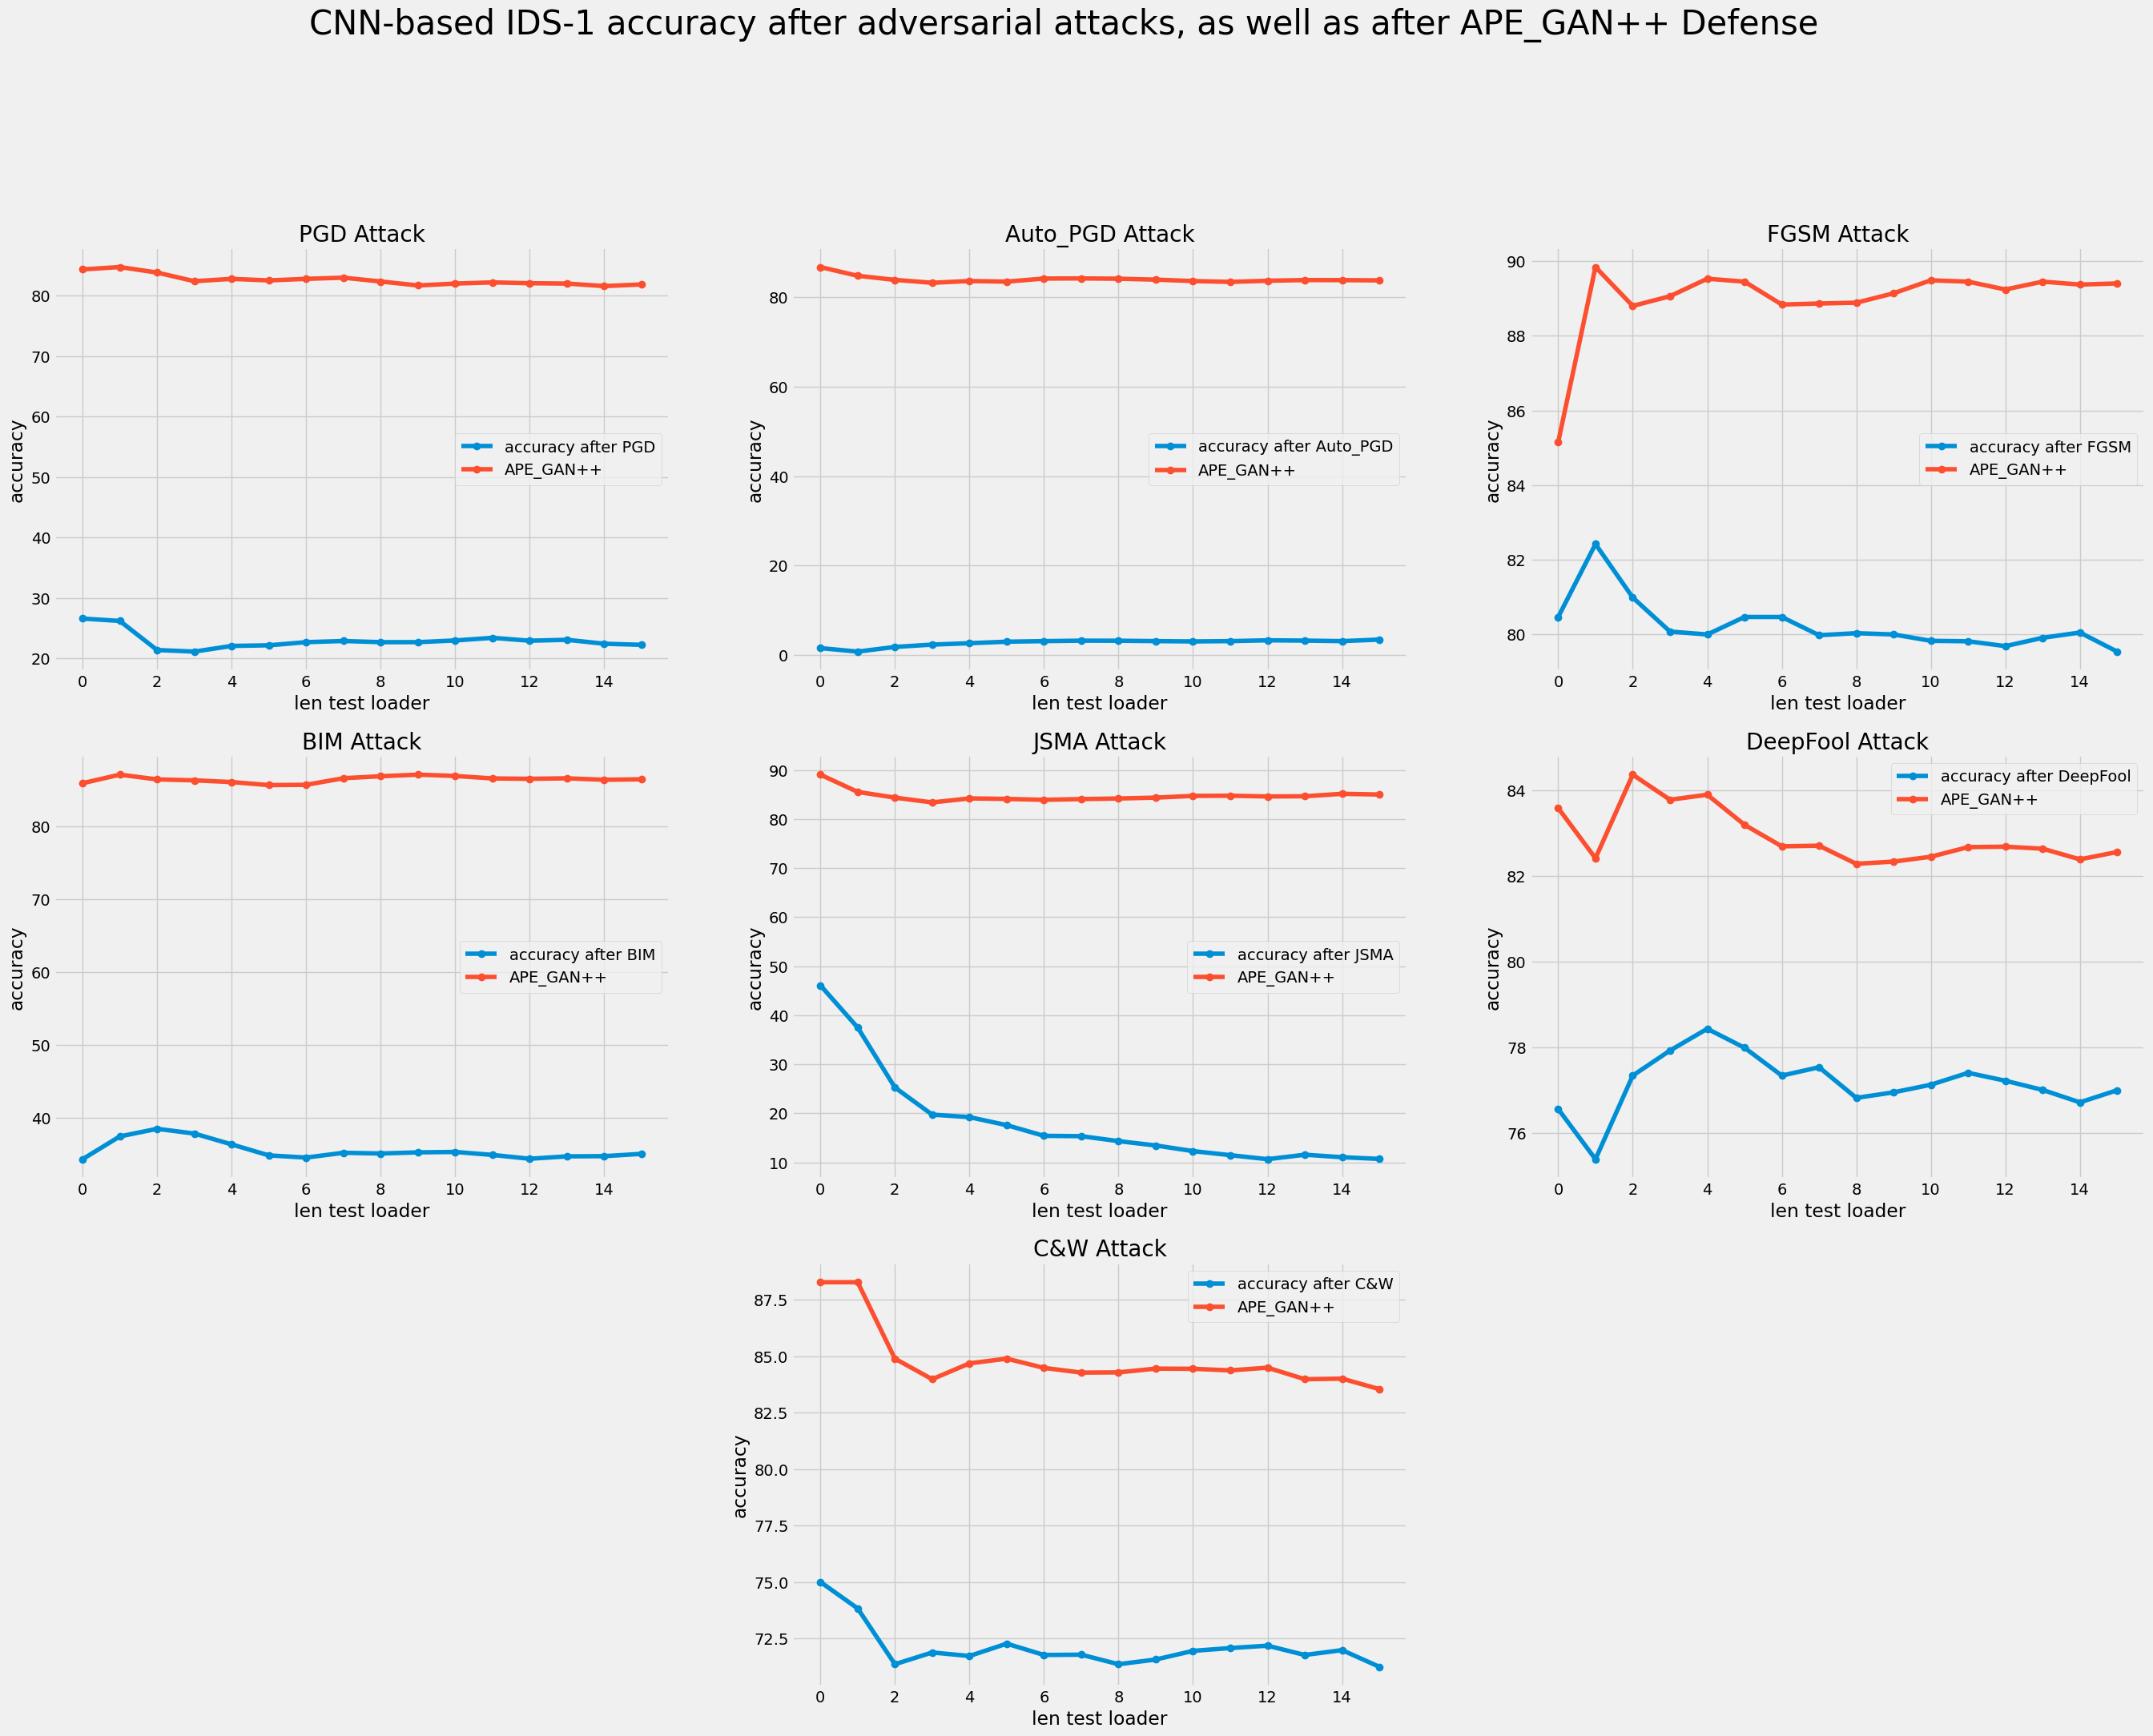

In [85]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(30, 30))
fig.suptitle('CNN-based IDS-1 accuracy after adversarial attacks, as well as after APE_GAN++ Defense', fontsize=30)

ax1 = plt.subplot2grid((4, 3), (0, 0))
ax1.plot(PGD_accu, 'o-')
ax1.plot(ape_gan_acc0, 'o-')
ax1.set(xlabel='len test loader', ylabel='accuracy')
ax1.set_title('PGD Attack')
ax1.legend(['accuracy after PGD', 'APE_GAN++'])


ax2 = plt.subplot2grid((4, 3), (0, 1))
ax2.plot(Auto_PGD_accu, 'o-')
ax2.plot(ape_gan_acc00, 'o-')
ax2.set(xlabel='len test loader', ylabel='accuracy')
ax2.set_title('Auto_PGD Attack')
ax2.legend(['accuracy after Auto_PGD', 'APE_GAN++'])

ax3 = plt.subplot2grid((4, 3), (0, 2))
ax3.plot(adv_accu, 'o-')
ax3.plot(ape_gan_acc1, 'o-')
ax3.set(xlabel='len test loader', ylabel='accuracy')
ax3.set_title('FGSM Attack')
ax3.legend(['accuracy after FGSM', 'APE_GAN++'])

ax4 = plt.subplot2grid((4, 3), (1, 0))
ax4.plot(bim_accu, 'o-')
ax4.plot(ape_gan_acc2, 'o-')
ax4.set(xlabel='len test loader', ylabel='accuracy')
ax4.set_title('BIM Attack')
ax4.legend(['accuracy after BIM', 'APE_GAN++'])

ax5 = plt.subplot2grid((4, 3), (1, 1))
ax5.plot(jsma_accu, 'o-')
ax5.plot(ape_gan_acc3, 'o-')
ax5.set(xlabel='len test loader', ylabel='accuracy')
ax5.set_title('JSMA Attack')
ax5.legend(['accuracy after JSMA', 'APE_GAN++'])

ax6 = plt.subplot2grid((4, 3), (1, 2))
ax6.plot(Deepfool_accu, 'o-')
ax6.plot(ape_gan_acc4, 'o-')
ax6.set(xlabel='len test loader', ylabel='accuracy')
ax6.set_title('DeepFool Attack')
ax6.legend(['accuracy after DeepFool', 'APE_GAN++'])

ax7 = plt.subplot2grid((4, 3), (2, 1))
ax7.plot(cw_accu, 'o-')
ax7.plot(ape_gan_acc5, 'o-')
ax7.set(xlabel='len test loader', ylabel='accuracy')
ax7.set_title('C&W Attack')
ax7.legend(['accuracy after C&W', 'APE_GAN++'])